# Brick Sound Quality Evaluation

This project analyzes audio recordings of brick sounds to determine their quality—whether they resemble metal (high-quality) or cardboard (low-quality) when struck together. It utilizes spectrogram analysis to visualize and evaluate the sound characteristics.

## Features:
- Audio processing using Librosa for spectrogram computation
- Quality evaluation based on spectrogram intensity
- Visual representation of spectrograms and evaluation results
- Display of evaluation results on a custom dot matrix display


## Installation

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


## Usage

1. Run the main script to evaluate brick sound quality:
2. Provide paths to audio files containing brick sounds.
3. The program will analyze each audio file and display the spectrogram.
4. It will classify each sound as "Metal" or "Cardboard" based on spectrogram intensity.
5. The total quality sum will be displayed on a custom dot matrix display.

In [ ]:
def display_sum_on_dot_matrix(sum_value):
    #function to set pixel color
    def set_pixel_color(x, y):
        if sum_value % 3 == 0:
            return 255, 0, 0  #red
        elif sum_value % 3 == 1:
            return 0, 255, 0  #green
        else:
            return 0, 0, 255  #blue

    dot_matrix = np.zeros((3, 3, 3), dtype=np.uint8)  #create a 3x3x3 dot matrix with pixel colors chosen
    for i in range(3):
        for j in range(3):
            dot_matrix[i, j] = set_pixel_color(i, j)

    #display
    plt.imshow(dot_matrix)
    plt.title(f'Sum: {sum_value}')
    plt.show()


## Test Cases

1. Metal Sound 1
2. Metal Sound 2
3. Cardboard Sound 1
4. Cardboard Sound 2



In [ ]:
def evaluate_quality(audio_path):

    # Load audio file using librosa
    y, sr = librosa.load(audio_path, sr=None)
    # sr = None preserves sampling rate

    # Set parameters for spectrogram computation
    n_fft = 2048  # FFT points
    hop_length = 512  # Sliding amount for windowed FFT
    # Compute mel spectrogram
    spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, fmax=22000)
    # Perform power to decibel ( dB ) image transformation
    spec_db = librosa.power_to_db(spec)


    mean_intensity = np.mean(spec_db)

    #display spectrogram images
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

    #telling quality label based on mean intensity
    return 'Metal' if mean_intensity > -25 else 'Cardboard'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_cases = [
    "/content/drive/MyDrive/Colab Notebooks/metal1.mp3",
    "/content/drive/MyDrive/Colab Notebooks/metal2.mp3",
    "/content/drive/MyDrive/Colab Notebooks/cardboard1.mp3",
    "/content/drive/MyDrive/Colab Notebooks/cardboard2.mp3"]

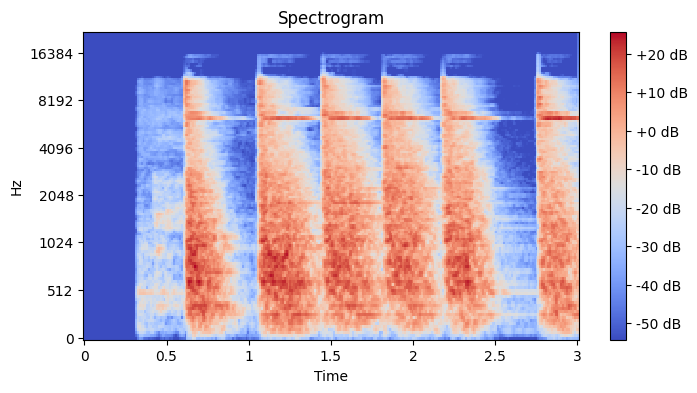

/content/drive/MyDrive/Colab Notebooks/metal1.mp3: Metal Quality


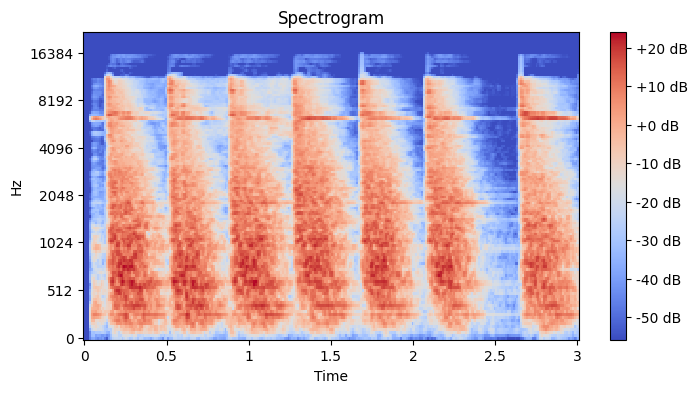

/content/drive/MyDrive/Colab Notebooks/metal2.mp3: Metal Quality


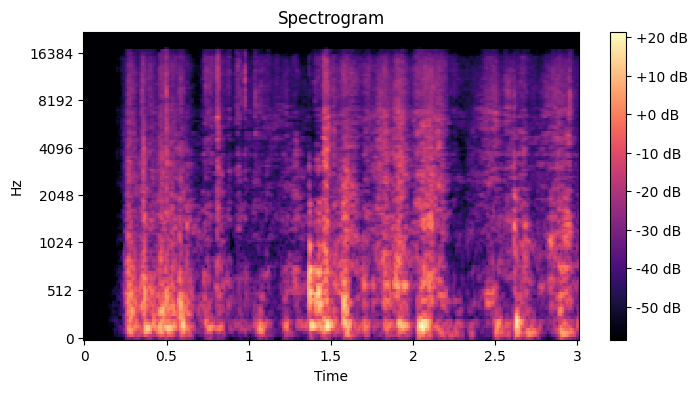

/content/drive/MyDrive/Colab Notebooks/cardboard1.mp3: Cardboard Quality


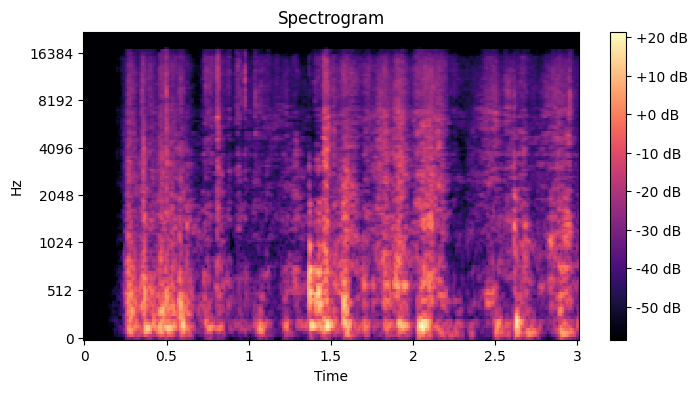

/content/drive/MyDrive/Colab Notebooks/cardboard2.mp3: Cardboard Quality


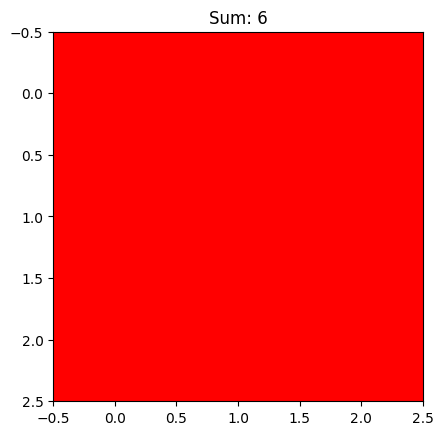

In [ ]:
total_sum = 0  #given

for audio_path in test_cases:
    quality_result = evaluate_quality(audio_path)

    if "Metal" in quality_result:
        total_sum += 1  #given
    elif "Cardboard" in quality_result:
        total_sum += 2  #given

    print(f"{audio_path}: {quality_result} Quality")

display_sum_on_dot_matrix(total_sum)
